# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

##### Exploring the dataframe with the 100 latest tweets including #100daysofcode and pandas or python

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Example importing the CSV here

tweets_df = pd.read_csv('../assets/coding-tweets.csv')
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          100 non-null    int64 
 1   text        100 non-null    object
 2   author_id   100 non-null    int64 
 3   created_at  100 non-null    object
 4   user_name   100 non-null    object
dtypes: int64(2), object(3)
memory usage: 4.0+ KB


In [5]:
tweets_df.head()

,id,text,author_id,created_at,user_name
0,1538489973900423168,Udemy Free Discount - Javascript Tutorial and ...,1112746419809452032,2022-06-19T11:52:48.000Z,Newcoupon01
1,1538489942225354752,Frontend Development:\nHTML: 3 hours\nCSS: 5 h...,1465541925918941184,2022-06-19T11:52:40.000Z,farazyaseen55
2,1538489536288006145,Redis: The Complete Developer's Guide\n\nhttps...,1300242863263870976,2022-06-19T11:51:03.000Z,CodingPseudo
3,1538489521104461828,#Hiring?\nSign up now https://t.co/o7lVlsl75X\...,1332714745871421443,2022-06-19T11:51:00.000Z,JobPreference
4,1538489309342359553,"""Well done is better than well said.""- Benjami...",1243665419501744133,2022-06-19T11:50:09.000Z,glitchbotio


In [3]:
# function to find a word in a text

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [10]:
# Initialize values to store tweet counts
pandas=0
python=0

# Iterate through df, counting the number of tweets in which each(pandas and python) is mentioned.
for index, row in tweets_df.iterrows():
    pandas += word_in_text('pandas', row['text'])
    python += word_in_text('python', row['text'])

print("Number of tweets in which pandas is mentioned:", pandas)
print("Number of tweets in which python is mentioned:", python)

Number of tweets in which pandas is mentioned: 1
Number of tweets in which python is mentioned: 99


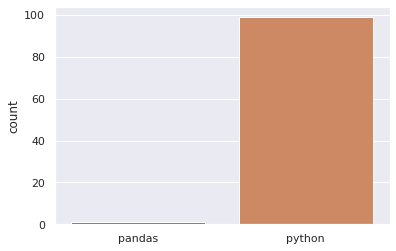

In [8]:
# Visualize the data

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['pandas', 'python']

# Plot the bar chart
ax = sns.barplot(x=cd, y=[pandas, python])
ax.set(ylabel="count")
plt.show()

In [10]:
# wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [12]:
texto = " ".join(tweet for tweet in tweets_df.text)
print ("There are {} words in the combination of all tweets.".format(len(texto)))

There are 25250 words in the combination of all tweets.


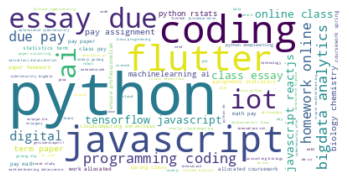

In [14]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["t", "co", "https", "100daysofcode"])

#transform to lowercase
texto=texto.lower()

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(texto)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()